# BioE 131 Lab 8 and 9
# Author: Jerry Yang



# Lab 8:
## Why do we expect short reads to produce a more fragmented assembly than long reads? 
Since the genome is so long and the reads are very short in comparison, the probability that a certain region of DNA gets degraded or at low coverage gets very high. Thus, many short reads lead to greater fragments

## Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina? 
Single molecule sequencing is less accurate because it involves fewer repetitions of sequencing (i.e. usually has less coverage). In addition, since each read corresponds to a single piece of DNA being read, the signal can be easily confused if there are small changes in the local environment. Contrast this to short reads, which have many repetitions in order to ensure the quality of biological signal.

## Why	is	N50	is	useful	statistic	to	calculate?	Why	not	just	list	the	mean	or	median	contig	length?
The N50 is a measurement that basically represents the weighted median contig. It gives greater weight to longer contigs (i.e. if you have a couple of very good contigs that cover most of your genome, you'll report this as being better than having many decent contigs that each only cover a small portion of the genome).

	
## In	your	assembly,	are	scaffolds	longer	than	contigs,	or	are	scaffolds	approximately	equal	to contigs?
They are approximately the same length, with the mean length of contigs being slightly shorter

In [32]:
# SPAdes command:
!spades.py -1 /data/Lab8_data/illumina_reads_R1.fastq -2 /data/Lab8_data/illumina_reads_R2.fastq --pacbio /data/Lab8_data/pacbio_reads.fastq -t 1 -o ./

# Output: Failed! 

Traceback (most recent call last):
  File "/home/softwares/SPAdes-3.13.1-Linux/bin/spades.py", line 797, in main
    ext_python_modules_home, only_compressing_is_needed, log)
  File "/bigdata/home/softwares/SPAdes-3.13.1-Linux/share/spades/spades_pipeline/hammer_logic.p
y", line 146, in run_hammer
    support.sys_call(command, log)
  File "/bigdata/home/softwares/SPAdes-3.13.1-Linux/share/spades/spades_pipeline/support.py", l
ine 245, in sys_call
    line = process_readline(proc.stdout.readline())
KeyboardInterrupt


== Error ==  exception caught: <type 'exceptions.KeyboardInterrupt'>
# I think this failed because of memory issues/architecture issues. Perhaps multiple people were requesting cores that made them unavailable to me at the time that I ran this command. Regardless, when I checked on it after a while, it had not finished and I manually broke the pipe to check on it.

SyntaxError: invalid syntax (<ipython-input-32-73e45ac79ac8>, line 6)

# Lab 9: Extra Credit


In [31]:
# Want to extract the contigs data, obtaining a vector of coverage values
# Then want to make a histogram of coverage values

# Plan of attack: extract contigs.fa using biopython
# Extract all of the descriptions
# Use pattern matching to get the coverage values
# Plot frequency histogram


In [13]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_protein
from Bio import SeqIO
from Bio import Phylo
import numpy as np
import matplotlib.pyplot as plt
import time
import re

descriptions = []
for seq_rec in SeqIO.parse("/data/Lab9_data/contigs.fasta", "fasta"):   
    descriptions.append(seq_rec.description)
descriptions[0:3]

['NODE_1_length_687571_cov_8.345136',
 'NODE_2_length_414008_cov_7.742363',
 'NODE_3_length_378948_cov_10.013238']

In [16]:
def extract_cov(des):
    """ Extracts the coverage from the description"""
    words = des.split("cov_")
    cov_val = words[1]
    return cov_val

print(extract_cov(descriptions[0]))

8.345136


In [26]:
cov_vals = []
for des in descriptions:
    c_v = float(extract_cov(des))
    cov_vals.append(c_v)
    
cov_vals

[8.345136,
 7.742363,
 10.013238,
 8.27163,
 8.930188,
 7.70554,
 8.708502,
 9.408938,
 7.139166,
 8.643695,
 7.908537,
 6.974964,
 8.264213,
 7.406215,
 8.848485,
 8.573446,
 9.58734,
 8.773279,
 7.420563,
 7.11981,
 8.039651,
 10.083467,
 7.788822,
 7.848049,
 7.600625,
 7.085566,
 7.570651,
 8.551374,
 7.722991,
 9.31012,
 8.122375,
 8.237615,
 7.422057,
 6.478663,
 8.118404,
 7.620261,
 7.990053,
 7.441171,
 7.613897,
 7.22619,
 7.314205,
 8.458643,
 8.956212,
 14.049242,
 10.363252,
 5.267947,
 7.087196,
 5.388827,
 0.708005,
 9.625,
 6.539275,
 4.627151,
 0.951477,
 0.812236,
 0.78481,
 6.890063,
 0.945032,
 0.915433,
 0.894292,
 0.862579,
 0.707207,
 9.168293,
 0.98005,
 0.630102,
 0.924675,
 0.97878,
 0.929919,
 0.937669,
 0.834688,
 0.9375,
 0.929348,
 0.937158,
 1.097493,
 0.944134,
 1.002801,
 0.977401,
 0.977337,
 0.864023,
 0.982906,
 1.054755,
 0.809798,
 0.742775,
 0.994186,
 0.94186,
 1.055394,
 1.008772,
 0.918129,
 1.008798,
 0.970674,
 0.692082,
 1.02071,
 1.026706,


Text(0.5, 1.0, 'Coverage Values')

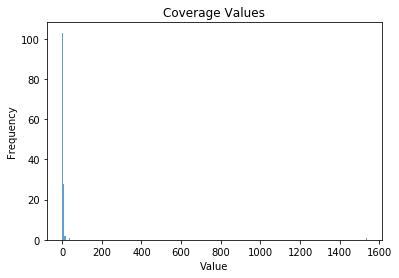

In [28]:
# Stolen from: https://realpython.com/python-histograms/

import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=cov_vals, bins='auto',
                            alpha=0.7, rwidth=0.85)
# plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Coverage Values')
# maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Text(0.5, 1.0, 'Coverage Values')

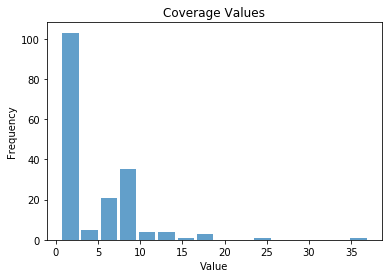

In [30]:
# Excluding valaues at 150 and 156:
# Stolen from: https://realpython.com/python-histograms/

cov_new = [c for c in cov_vals if c < 140]
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=cov_new, bins='auto',
                            alpha=0.7, rwidth=0.85)
# plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Coverage Values')
# maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## Is	coverage	uniformly	distributed?	Does	it	look	Gaussian?	Is	it	bimodal	or	trimodal?	

This distribution appears to be bimodal, with peaks at 0 and ~7-8. No the coverage is no uniformly distributed.

## What	explains	the	presence	of	contigs	with	coverage	an	integer	multiple	of	the	mean	coverage?
These may be regions with multiple copy number (i.e. genes that have been duplicated). Thus the quantity of these genes appear in interger multiples of each other.

In [1]:
!assembly-stats -t /data/Lab9_data/scaffolds.fasta

filename	total_length	number	mean_length	longest	shortest	N_count	Gaps	N50	N50n	N70	N70n	N90	N90n
/data/Lab9_data/scaffolds.fasta	6680345	176	37956.51	687571	129	20	2	234690	10	154232	17	83515	29


In [3]:
!assembly-stats -t /data/Lab9_data/contigs.fasta

filename	total_length	number	mean_length	longest	shortest	N_count	Gaps	N50	N50n	N70	N70n	N90	N90n
/data/Lab9_data/contigs.fasta	6680581	180	37114.34	687571	128	0	0	234690	10	154232	17	81821	29


In [ ]:
>NODE_22_length_103366_cov_10.083467:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
Identification: Genus = Pseudomonas
    Reference: https://rdp.cme.msu.edu/seqmatch/seqmatch_detailhier.jsp?qvector=255&depth=0&currentRoot=0&querySeq=seqmatch_seq&seqid=&num=20
            
    

>NODE_17_length_154232_cov_9.587340:124541-126086
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
Identification: Genus = Pseudomonas
     Ref: https://rdp.cme.msu.edu/seqmatch/seqmatch_sum.jsp?qvector=204&depth=0&currentRoot=0&num=20

>NODE_8_length_259210_cov_9.408938:63712-65257
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
Identification: Genus = Pseudomonas

>NODE_5_length_298800_cov_8.930188:13928-15473
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
Identification: Genus = Pseudomonas

>NODE_3_length_378948_cov_10.013238:348499-350044
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
Identification: Genus - Pseudomonas

>NODE_1_length_687571_cov_8.345136:46285-47830
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
  genus Pseudomonas
    
# Thus, I'd say this species is of genus Pseudomonas

# Mini report about Pseudomonas aeruginosa

Please	summarize	some	of	the	information	obtained	in	your	annotation,	placing	it	in	the	
context	of	any	papers	you	have	found	and	read	about	related	taxa.	Use no	more than	two	
pages of	text,	citing	no	more	than	two	references.	

Question to answer: Horizontal	gene	transfer	is	common	among	bacteria.	Is	there	any	evidence	for	HGT	in	your genome?
--
Yes! There is evidence of a specifc HGT of a 16s methylase gene transfer from E. Coli to Pseudomonas aeruginosa. According to Yokoyama et al., they detected the transfer of this gene (which grants resistance to an aminoglycoside) when they combined samples of nonresistant P aeruginosa and resistant E Coli. This is likely a survival adaptation to human-developed antibioitcs. However, the rate and conditions at which this horizontal gene transfer occurs is less known.

However, using information obtained from RAST, I can see that there is very little nucleotide similarity between this bacterial species and E. Coli, implying that there not much of the nucleotide diversity of P. aeruginosa can be attributed to horizontal gene transfer with E. Coli. This is in contrast to other strains, like N. gnoherrea, which constantly undergoes homologous recombination and as such, traces of other organisms DNA can often be detected at a non-zero level.


https://doi.org/10.1016/S0140-6736(03)14959-8 <=>
https://www.sciencedirect.com/science/article/pii/S0140673603149598
